In [92]:
import pandas as pd


In [94]:
daa=pd.read_csv("D:/hirescript/bank-additional/bank-additional-full.csv",sep=';')

In [96]:
daa.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [98]:
daa_to_dict = daa.T.to_dict().values()

In [100]:
from sklearn.feature_extraction import DictVectorizer

In [102]:
vect= DictVectorizer()
dict_to_arr =vect.fit_transform(data_dict).toarray()


In [104]:
feat_names = vect.get_feature_names()
print(feat_names)

['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact=cellular', 'contact=telephone', 'day_of_week=fri', 'day_of_week=mon', 'day_of_week=thu', 'day_of_week=tue', 'day_of_week=wed', 'default=no', 'default=unknown', 'default=yes', 'duration', 'education=basic.4y', 'education=basic.6y', 'education=basic.9y', 'education=high.school', 'education=illiterate', 'education=professional.course', 'education=university.degree', 'education=unknown', 'emp.var.rate', 'euribor3m', 'housing=no', 'housing=unknown', 'housing=yes', 'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid', 'job=management', 'job=retired', 'job=self-employed', 'job=services', 'job=student', 'job=technician', 'job=unemployed', 'job=unknown', 'loan=no', 'loan=unknown', 'loan=yes', 'marital=divorced', 'marital=married', 'marital=single', 'marital=unknown', 'month=apr', 'month=aug', 'month=dec', 'month=jul', 'month=jun', 'month=mar', 'month=may', 'month=nov', 'month=oct', 'month=sep', 'nr.employed', 'pdays

In [106]:
df =pd.DataFrame(dict_to_arr,columns = feat_names)
df.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


In [114]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [115]:
x= dict_to_arr[:,:-2]
x= np.hstack((x[:,:14],x[:,15:]))
y=dict_to_arr[:,-1]

In [116]:
clf=RandomForestClassifier(random_state =0)
clf.fit(x,y)
imp =clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf],axis =0)
indices = np.argsort(imp)[::-1]

for f in range(x.shape[1]):
    print(f+1,feat_names[indices[f]],imp[indices[f]])

1 age 0.167835076045
2 emp.var.rate 0.108792283256
3 campaign 0.0857666652822
4 month=sep 0.0433387218312
5 nr.employed 0.0400147672971
6 cons.price.idx 0.0354920618902
7 education=unknown 0.0223027262812
8 poutcome=success 0.0210819345063
9 euribor3m 0.0208728289295
10 poutcome=nonexistent 0.0203629957441
11 housing=unknown 0.019754439455
12 education=professional.course 0.017620956143
13 cons.conf.idx 0.0173128433194
14 marital=divorced 0.0168522696579
15 housing=yes 0.0166962668939
16 education=basic.9y 0.0160721304661
17 marital=married 0.015211007688
18 job=student 0.0149607758922
19 job=unknown 0.0148620313798
20 day_of_week=mon 0.0145264946763
21 loan=unknown 0.0143126166094
22 day_of_week=wed 0.0132934028624
23 day_of_week=fri 0.0131263769149
24 day_of_week=thu 0.0131051019242
25 day_of_week=tue 0.0129874587883
26 education=illiterate 0.0122364959897
27 job=admin. 0.0121736818783
28 education=basic.6y 0.0112179842238
29 loan=yes 0.0105924833948
30 job=self-employed 0.0091551237

In [117]:
import seaborn as sns

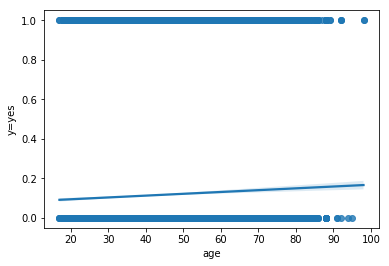

In [118]:
b = sns.regplot(x='age', y='y=yes',order=1,data=df,truncate = True)

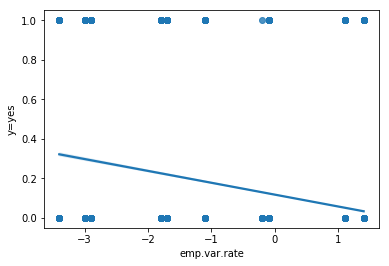

In [119]:
b = sns.regplot(x='emp.var.rate', y='y=yes',order=1,data=df,truncate = True)

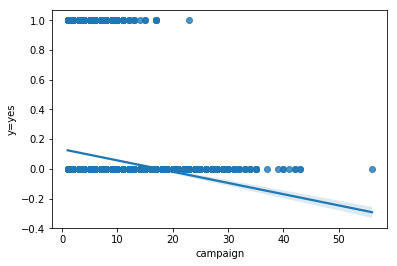

In [120]:
b = sns.regplot(x='campaign', y='y=yes',order=1,data=df,truncate = True)

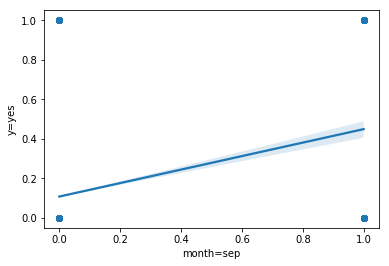

In [121]:
b = sns.regplot(x='month=sep', y='y=yes',order=1,data=df,truncate = True)

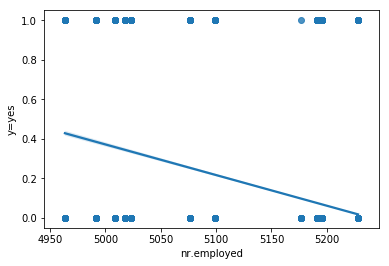

In [122]:
b = sns.regplot(x='nr.employed', y='y=yes',order=1,data=df,truncate = True)

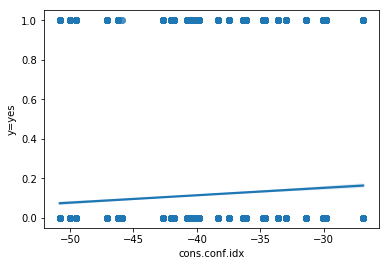

In [123]:
b = sns.regplot(x='cons.conf.idx', y='y=yes',order=1,data=df,truncate = True)

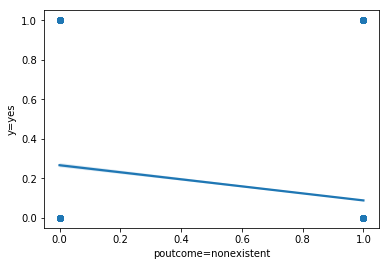

In [124]:
b = sns.regplot(x='poutcome=nonexistent', y='y=yes',order=1,data=df,truncate = True)

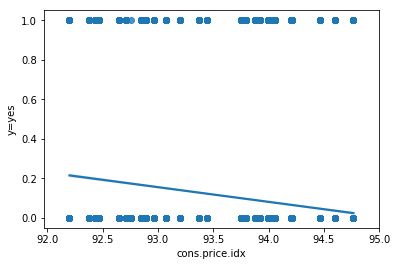

In [125]:
b = sns.regplot(x='cons.price.idx', y='y=yes',order=1,data=df,truncate = True)

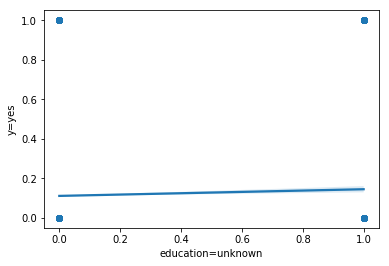

In [126]:
b = sns.regplot(x='education=unknown', y='y=yes',order=1,data=df,truncate = True)

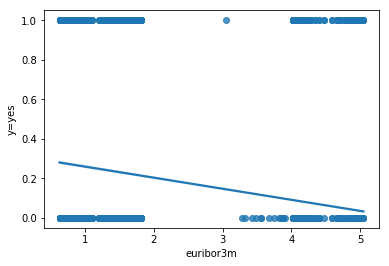

In [127]:
b = sns.regplot(x='euribor3m', y='y=yes',order=1,data=df,truncate = True)

In [128]:
sum(df['y=yes'])/sum(df['campaign'])

0.043875408967982296

In [132]:
for i in range(1,30):
    stp = sum(df.loc[df['campaign']==i]['y=yes']) / float(df.loc[df['campaign'] >= i].shape[0])
    print(str(i)+"\t\t" + str(stp))

1		0.05584150723511702
2		0.05143124097511254
3		0.04423551171393342
4		0.03261296660117878
5		0.024077046548956663
6		0.022156573116691284
7		0.015793848711554447
8		0.009566685424873381
9		0.012345679012345678
10		0.010968921389396709
11		0.01380897583429229
12		0.004335260115606936
13		0.007054673721340388
14		0.002105263157894737
15		0.0049261083743842365
16		0.0
17		0.013157894736842105
18		0.0
19		0.0
20		0.0
21		0.0
22		0.0
23		0.008620689655172414
24		0.0
25		0.0
26		0.0
27		0.0
28		0.0
29		0.0


In [133]:
print(" age upto 30")


for i in range(1,30):
    num = float(df[(df['age'] <= 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

 age upto 30
1 		 0.07502708559046588
2 		 0.07100309745055992
3 		 0.06274509803921569
4 		 0.04447739065974796
5 		 0.03882352941176471
6 		 0.02058319039451115
7 		 0.030805687203791468
8 		 0.006493506493506494
9 		 0.012875536480686695
10 		 0.005376344086021506
11 		 0.013888888888888888
12 		 0.0
13 		 0.010869565217391304
14 		 0.0
15 		 0.014705882352941176
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [134]:
print(" age between 30-40")

for i in range(1,30):
    num = float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

 age between 30-40
1 		 0.04882216526302942
2 		 0.042643923240938165
3 		 0.04005444293214078
4 		 0.028093645484949834
5 		 0.02048131080389145
6 		 0.024279210925644917
7 		 0.007494646680942184
8 		 0.008746355685131196
9 		 0.011538461538461539
10 		 0.011990407673860911
11 		 0.015015015015015015
12 		 0.0076045627376425855
13 		 0.009523809523809525
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.009259259259259259
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.02040816326530612
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [135]:

print("For age between 40-50")

for i in range(1,30):
    num = float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 40-50
1 		 0.03925397910360316
2 		 0.036345108695652176
3 		 0.03047676523838262
4 		 0.027820710973724884
5 		 0.020737327188940093
6 		 0.016853932584269662
7 		 0.008012820512820512
8 		 0.008368200836820083
9 		 0.005333333333333333
10 		 0.013888888888888888
11 		 0.017316017316017316
12 		 0.005434782608695652
13 		 0.006622516556291391
14 		 0.007936507936507936
15 		 0.0
16 		 0.0
17 		 0.023529411764705882
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [136]:

print(" age between 50-60")

for i in range(1,30):
    num = float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))


 age between 50-60
1 		 0.050709615691277306
2 		 0.05120481927710843
3 		 0.040806293018682396
4 		 0.024681528662420384
5 		 0.016766467065868262
6 		 0.02120141342756184
7 		 0.022004889975550123
8 		 0.013559322033898305
9 		 0.024489795918367346
10 		 0.009900990099009901
11 		 0.0
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.011363636363636364
16 		 0.0
17 		 0.016129032258064516
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [137]:
print(" age greater than 60")

for i in range(1,30):
    num = float(df[(df['age'] > 60) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = float(df[(df['age'] > 60) & (df['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

 age greater than 60
1 		 0.24807903402854006
2 		 0.25806451612903225
3 		 0.20512820512820512
4 		 0.19230769230769232
5 		 0.12244897959183673
6 		 0.12121212121212122
7 		 0.18181818181818182
8 		 0.06666666666666667
9 		 0.0
10 		 0.0
11 		 0.16666666666666666
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [145]:
total_no_calls = sum(df['campaign'])
print(total_calls)

105754.0


In [146]:
extra_no_calls = sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)

12040.0


In [148]:
reduction=100*extra_no_calls/total_no_calls
print(reduction)

11.384912154622993


In [149]:

total_sales=float(df[df['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [150]:
less_costly_sales=float(df[(df['campaign'] <= 6) & (df['y=yes']==1)].shape[0])
print(less_costly_sales)

4529.0


In [151]:

sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.60775862068965


In [ ]:
As we can see a reduction of 11.384% in marketing cost is achieved.The sales percent is 97.6 percent is maintained if we call a person a maximum of 6 times.